In [1]:
import pandas as pd 
import datetime as dt
import numpy as np

import requests
import json
from pprint import pprint
import csv

In [2]:
df =  pd.read_csv('features.csv')

/home/brownapple/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,4,7,10,13,16,19,22,25,28,34,37,40,43,46,49,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97,100,103,106,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,217,220,223,226,232,235,238,241,244,247,250,253,256,259,265,268,271,274,277,280,283,286,289,292,295,298,301,304,307,310,313,316,319,322,325,328,331,334,337,340,343,346,349,352,355,358,361,364,367,370,373,376,379,382,385,388,391,394,397,403,406,409,412,415,418,421,424,427,430,433,436,439,442,445,448,451,454,457,460,463,466,469,472,475,478,481,484,487,490,493,496) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,CME_QXD,CME_QXS,CME_QXV,LIFFE_RD,LIFFE_RS,LIFFE_RV,SHFE_RBD,SHFE_RBS,SHFE_RBV,...,CME_MEV,CME_MEOD,CME_MEOS,CME_MEOV,CME_MFD,CME_MFS,CME_MFV,CME_MFFD,CME_MFFS,CME_MFFV
0,0,2018-11-27,77.68,0.0,2019-05-01,127.61,88149.0,2019-04-30,4192.0,143910.0,...,0.0,2019-05-01,684.125,0.0,2019-05-01,66.05,0.0,2019-05-01,71.60,0.0
1,1,2018-11-26,77.68,0.0,2019-04-30,127.32,214495.0,2019-04-29,4179.0,86764.0,...,0.0,2019-04-30,684.125,0.0,2019-04-30,66.04,0.0,2019-04-30,68.58,0.0
2,2,2018-11-23,77.55,0.0,2019-04-29,127.67,111667.0,2019-04-26,4145.0,78638.0,...,0.0,2019-04-29,683.631,0.0,2019-04-29,66.04,0.0,2019-04-29,68.58,0.0
3,3,2018-11-21,77.55,0.0,2019-04-26,127.75,133857.0,2019-04-25,4143.0,96228.0,...,0.0,2019-04-26,684.079,0.0,2019-04-26,66.01,0.0,2019-04-26,68.60,0.0
4,4,2018-11-20,77.55,0.0,2019-04-25,127.62,126012.0,2019-04-24,4135.0,130212.0,...,0.0,2019-04-25,684.730,0.0,2019-04-24,66.29,0.0,2019-04-25,69.25,0.0


In [4]:
sample_df = df[["SHFE_RBD","SHFE_RBS"]]
sample_df.head()

,SHFE_RBD,SHFE_RBS
0,2019-04-30,4192.0
1,2019-04-29,4179.0
2,2019-04-26,4145.0
3,2019-04-25,4143.0
4,2019-04-24,4135.0


In [14]:
sample_df = sample_df.set_index('SHFE_RBD')

In [50]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///trade.sqlite")

NameError: name 'create_engine' is not defined

In [34]:
Base = automap_base()

In [35]:
Base.prepare(engine, reflect=True)

In [36]:
Base.classes.keys()

['exports', 'imports']

In [37]:
export = Base.classes.exports

In [38]:
session = Session(engine)

In [5]:
# newList = []
# for row in session.query(export.Period).all():
#     print(row)

In [6]:
# newList = []
# for row in session.query(export.Period).all():
#     newList.append(row.__dict__)

In [7]:
api_key = "93ba5366cb39b249dcbde95cc4d461e7b05b747d"
export_url = (f"https://api.census.gov/data/timeseries/intltrade/exports")
import_url = (f"https://api.census.gov/data/timeseries/intltrade/imports")
china_code = "5700"
usa_code = "1000"
month = []
year = []

In [8]:
export_by_commodity = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2015-01&COMM_LVL=HS4").json()


In [11]:
len(export_by_commodity)

62429

In [12]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 62428:
    count += 1
    movalue.append(export_by_commodity[count][2])
    yrvalue.append(export_by_commodity[count][3])
    desc.append(export_by_commodity[count][1])
    period.append(export_by_commodity[count][4])
    code.append(export_by_commodity[count][0])
Export = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value" : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

In [13]:
Export.head()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,80062016,28872544,2016-03,"WIRE, RODS ETC FOR SOLDER",8311
1,243870938,122169910,2016-02,"LUBRICATING PREPS, ANTIR",3403
2,630433253,125004276,2016-05,"LUBRICATING PREPS, ANTIR",3403
3,1004995453,165036377,2018-07,"LUBRICATING PREPS, ANTIR",3403
4,25013744,25013744,2018-01,"WIRE, RODS ETC FOR SOLDER",8311


In [14]:
df_2015 = Export[Export["Comm Code"].str.contains("1006")]

In [27]:
df_2015.head()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
19692,888066879,106112723,2018-06,RICE,1006
19693,762175744,166165458,2016-05,RICE,1006
19697,1522382411,190074838,2018-11,RICE,1006
19698,1375640684,163490442,2016-09,RICE,1006
19702,596010286,157634436,2016-04,RICE,1006


In [28]:
Export["YTD Value"] =pd.to_numeric(Export["YTD Value"])
Export["Monthly Value"] =pd.to_numeric(Export["Monthly Value"])
Export["Period"]=pd.to_datetime(Export.Period)

In [29]:
df_2015["YTD Value"] =pd.to_numeric(df_2015["YTD Value"])
df_2015["Monthly Value"] =pd.to_numeric(df_2015["Monthly Value"])

/home/brownapple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/brownapple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
df_2015["Monthly Value"].sum()

7633479007

In [31]:
df_2015.head()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
19692,888066879,106112723,2018-06,RICE,1006
19693,762175744,166165458,2016-05,RICE,1006
19697,1522382411,190074838,2018-11,RICE,1006
19698,1375640684,163490442,2016-09,RICE,1006
19702,596010286,157634436,2016-04,RICE,1006


In [32]:
def commodity(trade,code):
    data = trade[trade["Comm Code"].str.contains(code)]
    data = data.sort_values(by='Period', ascending=True)
    data = data.reset_index()
    
    return data

In [33]:
rice = commodity(Export,"1007")

In [34]:
rice.head()

,index,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,47242,198504519,198504519,2015-01-01,GRAIN SORGHUM,1007
1,47232,423896637,225392118,2015-02-01,GRAIN SORGHUM,1007
2,47224,679852947,255956310,2015-03-01,GRAIN SORGHUM,1007
3,47231,912178609,232325662,2015-04-01,GRAIN SORGHUM,1007
4,47239,1045776472,133597863,2015-05-01,GRAIN SORGHUM,1007


In [35]:
trade = rice[["Period", "Monthly Value"]]
trade = trade.set_index('Period')
trade.head()

,Monthly Value
Period,
2015-01-01,198504519
2015-02-01,225392118
2015-03-01,255956310
2015-04-01,232325662
2015-05-01,133597863


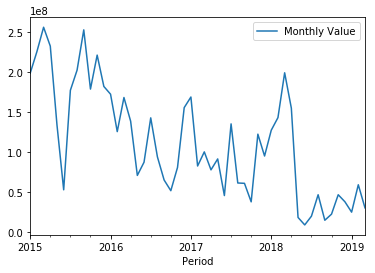

In [36]:
trade.plot()

In [37]:
trade.describe()

,Monthly Value
count,5.100000e+01
mean,1.115291e+08
std,6.965062e+07
min,8.608271e+06
25%,5.198692e+07
50%,9.482746e+07
75%,1.683440e+08
max,2.559563e+08


In [39]:
# fbProphet Model 
?conda install pystan -c conda-forge
?conda install -c conda-forge fbprophet

Object `conda install pystan -c conda-forge` not found.
Object `conda install -c conda-forge fbprophet` not found.


In [129]:
rice = commodity(Export,"2505")
rice.head()

,index,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,14166,44192651,44192651,2015-01-01,"NATURAL SANDS OF ALL KINDS, EXCEPT METAL-BEARING",2505
1,14206,79118936,34926285,2015-02-01,"NATURAL SANDS OF ALL KINDS, EXCEPT METAL-BEARING",2505
2,14158,115756788,36637852,2015-03-01,"NATURAL SANDS OF ALL KINDS, EXCEPT METAL-BEARING",2505
3,14187,143026467,27269679,2015-04-01,"NATURAL SANDS OF ALL KINDS, EXCEPT METAL-BEARING",2505
4,14175,168479782,25453315,2015-05-01,"NATURAL SANDS OF ALL KINDS, EXCEPT METAL-BEARING",2505


In [130]:
trade = rice[["Period", "Monthly Value"]]
trade = trade.set_index('Period')
trade.head()

,Monthly Value
Period,
2015-01-01,44192651
2015-02-01,34926285
2015-03-01,36637852
2015-04-01,27269679
2015-05-01,25453315


In [131]:
import fbprophet

In [132]:
trade = trade.reset_index()


In [133]:
trade.head()

,Period,Monthly Value
0,2015-01-01,44192651
1,2015-02-01,34926285
2,2015-03-01,36637852
3,2015-04-01,27269679
4,2015-05-01,25453315


In [134]:
trade = trade.rename(columns={'Period': 'ds', 'Monthly Value': 'y'})

In [135]:
trade.head()

,ds,y
0,2015-01-01,44192651
1,2015-02-01,34926285
2,2015-03-01,36637852
3,2015-04-01,27269679
4,2015-05-01,25453315


In [136]:
trade_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
trade_prophet.fit(trade)

C:\Users\Bashira\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bashira\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [137]:
trade_forecast = trade_prophet.make_future_dataframe(periods=12, freq='M')

In [138]:
trade_forecast = trade_prophet.predict(trade_forecast)

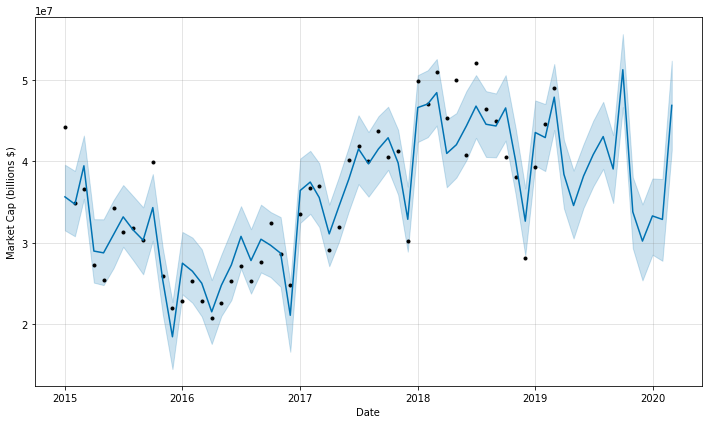

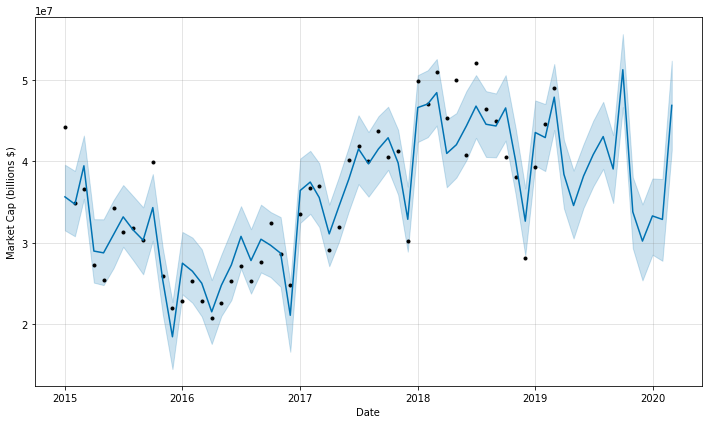

In [139]:
trade_prophet.plot(trade_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')

In [140]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [141]:
trade_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,3.242233e+07,3.151967e+07,3.958275e+07,3.242233e+07,3.242233e+07,3.218622e+06,3.218622e+06,3.218622e+06,3.218622e+06,3.218622e+06,3.218622e+06,0.0,0.0,0.0,3.564095e+07
1,2015-02-01,3.184235e+07,3.080156e+07,3.882494e+07,3.184235e+07,3.184235e+07,2.897048e+06,2.897048e+06,2.897048e+06,2.897048e+06,2.897048e+06,2.897048e+06,0.0,0.0,0.0,3.473940e+07
2,2015-03-01,3.131850e+07,3.540259e+07,4.316640e+07,3.131850e+07,3.131850e+07,8.135930e+06,8.135930e+06,8.135930e+06,8.135930e+06,8.135930e+06,8.135930e+06,0.0,0.0,0.0,3.945443e+07
3,2015-04-01,3.073852e+07,2.510699e+07,3.289702e+07,3.073852e+07,3.073852e+07,-1.755640e+06,-1.755640e+06,-1.755640e+06,-1.755640e+06,-1.755640e+06,-1.755640e+06,0.0,0.0,0.0,2.898288e+07
4,2015-05-01,3.017725e+07,2.480365e+07,3.288169e+07,3.017725e+07,3.017725e+07,-1.414526e+06,-1.414526e+06,-1.414526e+06,-1.414526e+06,-1.414526e+06,-1.414526e+06,0.0,0.0,0.0,2.876272e+07


In [142]:
trade_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
58,2019-10-31,3.379371e+07,2.932567e+07,3.806198e+07
59,2019-11-30,3.020849e+07,2.537643e+07,3.470727e+07
60,2019-12-31,3.329849e+07,2.853398e+07,3.789850e+07
61,2020-01-31,3.286677e+07,2.778785e+07,3.782531e+07
62,2020-02-29,4.687384e+07,4.139866e+07,5.235557e+07


In [143]:
metric_df = trade_forecast.set_index('ds')[['yhat']].join(trade.set_index('ds').y).reset_index()

In [144]:
metric_df.tail()

,ds,yhat,y
58,2019-10-31,3.379371e+07,NaN
59,2019-11-30,3.020849e+07,NaN
60,2019-12-31,3.329849e+07,NaN
61,2020-01-31,3.286677e+07,NaN
62,2020-02-29,4.687384e+07,NaN


In [145]:
metric_df.dropna(inplace=True)

In [146]:

metric_df.tail()

,ds,yhat,y
46,2018-11-01,4.005533e+07,38107121.0
47,2018-12-01,3.265426e+07,28104012.0
48,2019-01-01,4.354452e+07,39331470.0
49,2019-02-01,4.292011e+07,44587071.0
50,2019-03-01,4.788547e+07,48990588.0


In [147]:
r2_score(metric_df.y, metric_df.yhat)

0.8710254857695249

In [148]:
mean_squared_error(metric_df.y, metric_df.yhat)

10047708706861.535